# Unsupervised ML (Clustering)

In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# District wise crimes committed IPC

In [2]:
#load the dataset
df = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT TO MURDER',
 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
 'RAPE',
 'CUSTODIAL RAPE',
 'OTHER RAPE',
 'KIDNAPPING & ABDUCTION',
 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
 'KIDNAPPING AND ABDUCTION OF OTHERS',
 'DACOITY',
 'PREPARATION AND ASSEMBLY FOR DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO THEFT',
 'OTHER THEFT',
 'RIOTS',
 'CRIMINAL BREACH OF TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS HURT',
 'DOWRY DEATHS',
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
 'INSULT TO MODESTY OF WOMEN',
 'CRUELTY BY HUSBAND OR HIS RELATIVES',
 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
 'CAUSING DEATH BY NEGLIGENCE',
 'OTHER IPC CRIMES',
 'TOTAL IPC CRIMES']

In [4]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [5]:
df=df[df['DISTRICT']!='TOTAL']

In [6]:
IPC_CRIMES=df[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]
IPC_CRIMES

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9010,DELHI UT,STF,2012,6
9011,DELHI UT,WEST,2012,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787


# District wise crimes committed against ST

In [7]:
#load the dataset
df1 = pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [8]:
df1.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Murder',
 'Rape',
 'Kidnapping Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Protection of Civil Rights (PCR) Act',
 'Prevention of atrocities (POA) Act',
 'Other Crimes Against STs']

In [9]:
df1['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [10]:
df1=df1[df1['DISTRICT']!='TOTAL']

In [11]:
df1['TOTAL CRIMES AGAINST ST']=df1.iloc[:,3:].sum(axis=1)

In [12]:
CRIMES_AGAINST_ST=df1[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]
CRIMES_AGAINST_ST

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


# District wise crimes committed against SC

In [13]:
#load the dataset
df2 = pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [14]:
df2.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Murder',
 'Rape',
 'Kidnapping and Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Prevention of atrocities (POA) Act',
 'Protection of Civil Rights (PCR) Act',
 'Other Crimes Against SCs']

In [15]:
df2['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [16]:
df2=df2[df2['DISTRICT']!='TOTAL']

In [17]:
df2['TOTAL CRIMES AGAINST SC']=df2.iloc[:,3:].sum(axis=1)

In [18]:
CRIMES_AGAINST_SC=df2[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]
CRIMES_AGAINST_SC

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


# District wise crimes committed against women

In [19]:
#load the dataset
df3 = pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")
df3

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [20]:
df3.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [21]:
df3['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [22]:
df3=df3[df3['DISTRICT']!='TOTAL']

In [23]:
df3['TOTAL CRIMES AGAINST WOMEN']=df3.iloc[:,3:].sum(axis=1)

In [24]:
 CRIMES_AGAINST_WOMEN=df3[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]
CRIMES_AGAINST_WOMEN

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


# District wise crimes committed against children

In [25]:
#load the dataset
df4 = pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")
df4

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [26]:
df4.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Murder',
 'Rape',
 'Kidnapping and Abduction',
 'Foeticide',
 'Abetment of suicide',
 'Exposure and abandonment',
 'Procuration of minor girls',
 'Buying of girls for prostitution',
 'Selling of girls for prostitution',
 'Prohibition of child marriage act',
 'Other Crimes',
 'Total']

In [27]:
df4['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [28]:
df4=df4[df4['DISTRICT']!='TOTAL']

In [29]:
df4.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [30]:
CRIMES_AGAINST_CHILDREN=df4[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]
CRIMES_AGAINST_CHILDREN

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


# MERGING THE ABOVE DATASETS

In [31]:
cluster=pd.merge(IPC_CRIMES,CRIMES_AGAINST_ST,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(CRIMES_AGAINST_SC,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(CRIMES_AGAINST_WOMEN,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(CRIMES_AGAINST_CHILDREN,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,4154,2001,18,55,454,0
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,2001,14,127,356,66
2,ANDHRA PRADESH,CHITTOOR,2001,5818,2001,2,114,456,0
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,2001,4,100,278,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,2001,14,89,475,0
...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,202,2012,0,0,6,7
8405,DAMAN & DIU,DIU,2012,37,2012,0,0,2,1
8406,LAKSHADWEEP,LAKSHADWEEP,2012,60,2012,0,0,2,0
8407,PUDUCHERRY,KARAIKAL,2012,787,2012,0,1,11,7


In [32]:
cluster.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'TOTAL IPC CRIMES',
 'Year',
 'TOTAL CRIMES AGAINST ST',
 'TOTAL CRIMES AGAINST SC',
 'TOTAL CRIMES AGAINST WOMEN',
 'TOTAL CRIMES AGAINST CHILDREN']

In [33]:
cluster.drop(columns='Year',axis=1,inplace=True)

In [34]:
cluster.columns.to_list()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'TOTAL IPC CRIMES',
 'TOTAL CRIMES AGAINST ST',
 'TOTAL CRIMES AGAINST SC',
 'TOTAL CRIMES AGAINST WOMEN',
 'TOTAL CRIMES AGAINST CHILDREN']

In [35]:
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,4154,18,55,454,0
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,14,127,356,66
2,ANDHRA PRADESH,CHITTOOR,2001,5818,2,114,456,0
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,4,100,278,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,14,89,475,0
...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,202,0,0,6,7
8405,DAMAN & DIU,DIU,2012,37,0,0,2,1
8406,LAKSHADWEEP,LAKSHADWEEP,2012,60,0,0,2,0
8407,PUDUCHERRY,KARAIKAL,2012,787,0,1,11,7


We have merged all our datasets.

# Let's create groups and sum all the crimes over the years

In [36]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index()
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
0,A & N ISLANDS,A and N ISLANDS,2007,807,1,0,54,10
1,A & N ISLANDS,ANDAMAN,20059,7377,33,0,458,206
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,3,0,11,1
4,A & N ISLANDS,NORTH,2012,115,0,0,9,7
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,9,8,3180,8
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,134,2
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,1,0,61,7
799,WEST BENGAL,SILIGURI_PC,2012,3023,8,0,552,44


# 4.1  Creating clusters

In [37]:
x = cluster.iloc[:,2:]
x

,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
0,2007,807,1,0,54,10
1,20059,7377,33,0,458,206
2,2012,24,0,0,2,2
3,20059,235,3,0,11,1
4,2012,115,0,0,9,7
...,...,...,...,...,...,...
796,24078,16958,9,8,3180,8
797,24078,4746,0,0,134,2
798,24078,1760,1,0,61,7
799,2012,3023,8,0,552,44


In [38]:
#Clustering using KMeans cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [57]:
pd.value_counts(y_kmeans)

1    536
0    247
2     18
dtype: int64

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

# 1. Sensitive Area's

In [58]:
Sensitive_regions=cluster[y_kmeans==2]

In [59]:
Sensitive_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
10,ANDHRA PRADESH,CYBERABAD,20075,141743,341,1657,15411,296
15,ANDHRA PRADESH,HYDERABAD CITY,24078,202931,76,1293,19685,872
121,BIHAR,PATNA,24078,147542,33,1503,5931,893
168,GUJARAT,AHMEDABAD COMMR.,24078,218005,41,798,14973,1435
304,KARNATAKA,BANGALORE COMMR.,24078,350347,16,1423,9010,675
342,KERALA,ERNAKULAM RURAL,18072,114393,14,299,3072,269
372,MADHYA PRADESH,BHOPAL,24078,169575,226,1565,7087,1326
383,MADHYA PRADESH,GWALIOR,24078,111206,595,2310,5760,1582
386,MADHYA PRADESH,INDORE,24078,204398,421,1139,10392,4401
388,MADHYA PRADESH,JABALPUR,24078,119446,649,952,7855,1203


# 2. Moderate Area's

In [60]:
Moderate_regions=cluster[y_kmeans==0]

In [61]:
Moderate_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
6,ANDHRA PRADESH,ADILABAD,24078,61959,269,686,8583,269
7,ANDHRA PRADESH,ANANTAPUR,24078,59927,371,1569,5287,402
8,ANDHRA PRADESH,CHITTOOR,24078,75471,14,1393,8004,345
9,ANDHRA PRADESH,CUDDAPAH,24078,58147,128,1537,5002,574
11,ANDHRA PRADESH,EAST GODAVARI,24078,93193,223,2042,9514,213
...,...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,24078,35343,15,6,7811,237
792,WEST BENGAL,MURSHIDABAD,24078,85689,13,13,27004,923
793,WEST BENGAL,NADIA,24078,79313,1,0,17582,94
794,WEST BENGAL,PASCHIM MIDNAPUR,22077,38981,11,6,7875,29


# 3. Peaceful Area's

In [62]:
peaceful_regions=cluster[y_kmeans==1]

In [63]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN
0,A & N ISLANDS,A and N ISLANDS,2007,807,1,0,54,10
1,A & N ISLANDS,ANDAMAN,20059,7377,33,0,458,206
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,3,0,11,1
4,A & N ISLANDS,NORTH,2012,115,0,0,9,7
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,9,8,3180,8
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,134,2
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,1,0,61,7
799,WEST BENGAL,SILIGURI_PC,2012,3023,8,0,552,44


# 4.3  Analyse your clusters and prepare a report that explains all your observations.

# Most sensitive areas

In [64]:
Sensitive_regions['OVERALL CRIME'] = Sensitive_regions.iloc[:,2:].sum(axis=1)
Sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
Sensitive=Sensitive_regions.reset_index().drop(['index'],axis=1)
Sensitive

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,OVERALL CRIME
0,KARNATAKA,BANGALORE COMMR.,24078,350347,16,1423,9010,675,385549
1,GUJARAT,AHMEDABAD COMMR.,24078,218005,41,798,14973,1435,259330
2,MAHARASHTRA,MUMBAI COMMR.,14063,222670,11,186,9304,2865,249099
3,ANDHRA PRADESH,HYDERABAD CITY,24078,202931,76,1293,19685,872,248935
4,MADHYA PRADESH,INDORE,24078,204398,421,1139,10392,4401,244829
5,MADHYA PRADESH,BHOPAL,24078,169575,226,1565,7087,1326,203857
6,TAMIL NADU,CHENNAI,24078,164467,0,132,6469,474,195620
7,WEST BENGAL,KOLKATA,24078,158429,1,17,9797,1730,194052
8,BIHAR,PATNA,24078,147542,33,1503,5931,893,179980
9,ANDHRA PRADESH,CYBERABAD,20075,141743,341,1657,15411,296,179523


We can see how extreme the number of crimes are in these sensitive areas. Hence, we can say that these are the most unsafe states or areas.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

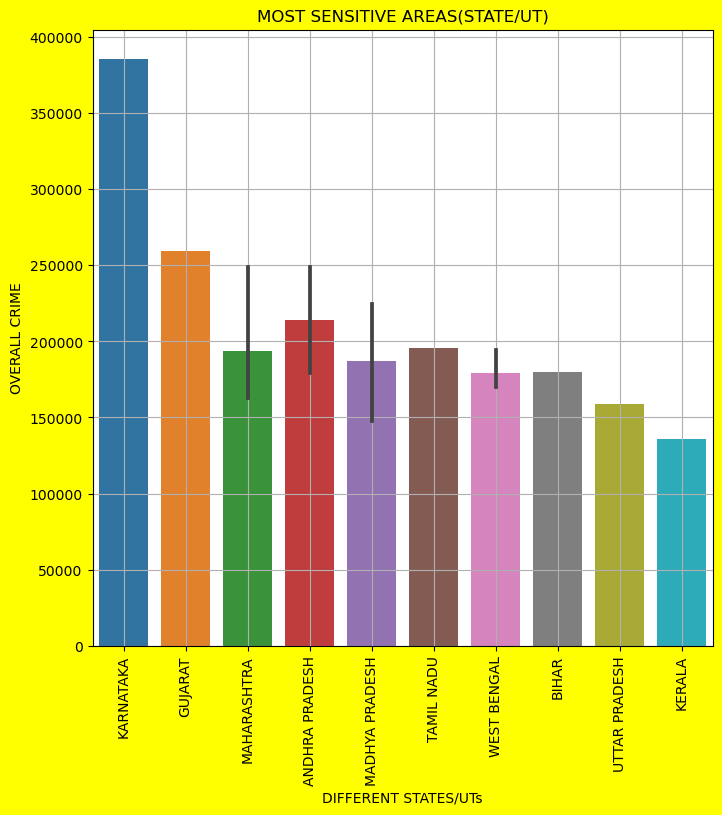

In [68]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Sensitive['STATE/UT'],y=Sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST SENSITIVE AREAS(STATE/UT)")
plt.grid()
plt.show()

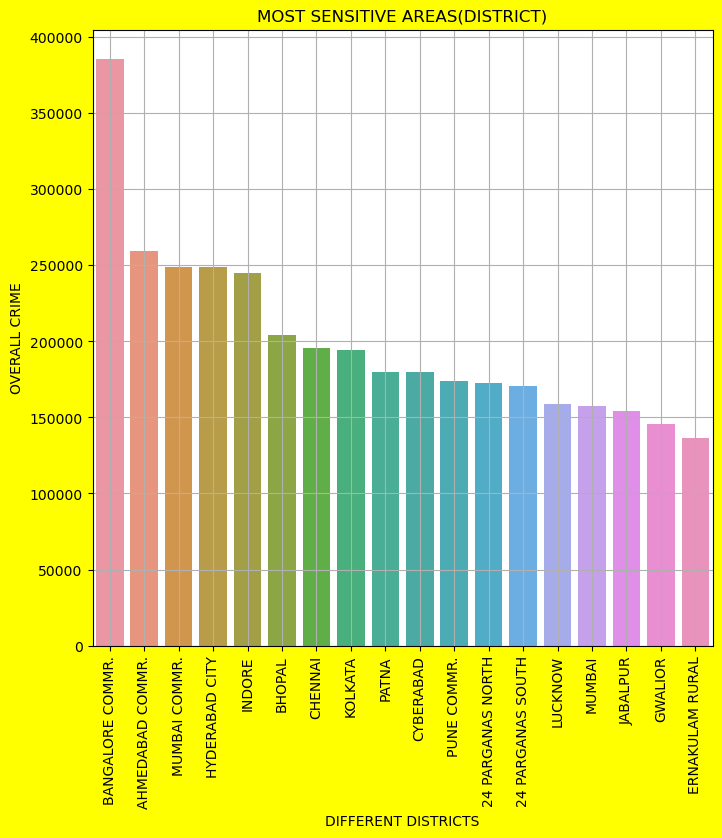

In [69]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Sensitive['DISTRICT'],y=Sensitive['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT DISTRICTS")
plt.title("MOST SENSITIVE AREAS(DISTRICT)")
plt.grid()
plt.show()

# Most peaceful areas

In [65]:
peaceful_regions['OVERALL CRIME'] = peaceful_regions.iloc[:,2:].sum(axis=1)
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)
Peaceful=peaceful_regions.reset_index().drop(['index'],axis=1)
Peaceful

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST WOMEN,TOTAL CRIMES AGAINST CHILDREN,OVERALL CRIME
0,MAHARASHTRA,JALNA,24078,33162,24,328,4485,338,62415
1,UTTAR PRADESH,KHIRI,24078,30858,2,1871,4286,549,61644
2,MADHYA PRADESH,BALAGHAT,24078,32210,500,426,3286,1089,61589
3,MAHARASHTRA,SANGLI,24078,33509,6,245,2534,764,61136
4,CHHATTISGARH,JANJGIR,24078,31993,210,584,3165,955,60985
...,...,...,...,...,...,...,...,...,...
531,A & N ISLANDS,CAR,2012,24,0,0,2,2,2040
532,ASSAM,BIEO,2012,16,0,0,0,0,2028
533,JAMMU & KASHMIR,RAILWAYS KMR,2009,10,0,0,2,0,2021
534,TRIPURA,G.R.P.,2010,6,0,0,1,0,2017


We can see that the peaceful areas have much more lesser crimes as compared to most sensitive areas. Hence, we can say that these are the most safe states or areas.

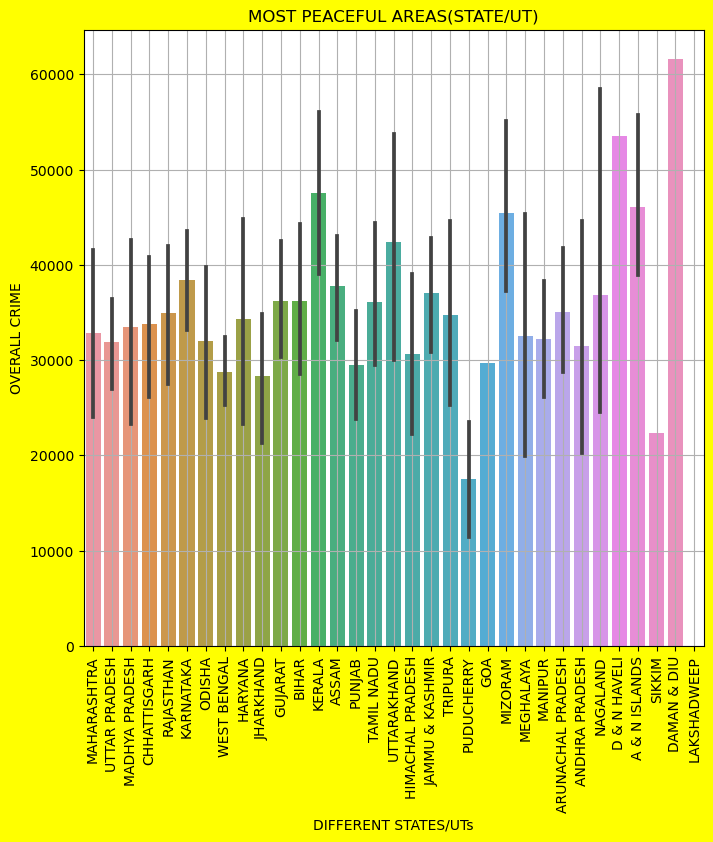

In [70]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.barplot(x=Peaceful['STATE/UT'],y=peaceful_regions['OVERALL CRIME'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST PEACEFUL AREAS(STATE/UT)")
plt.grid()
plt.show()

# 1. What is impacting more crimes in sensitive areas. 

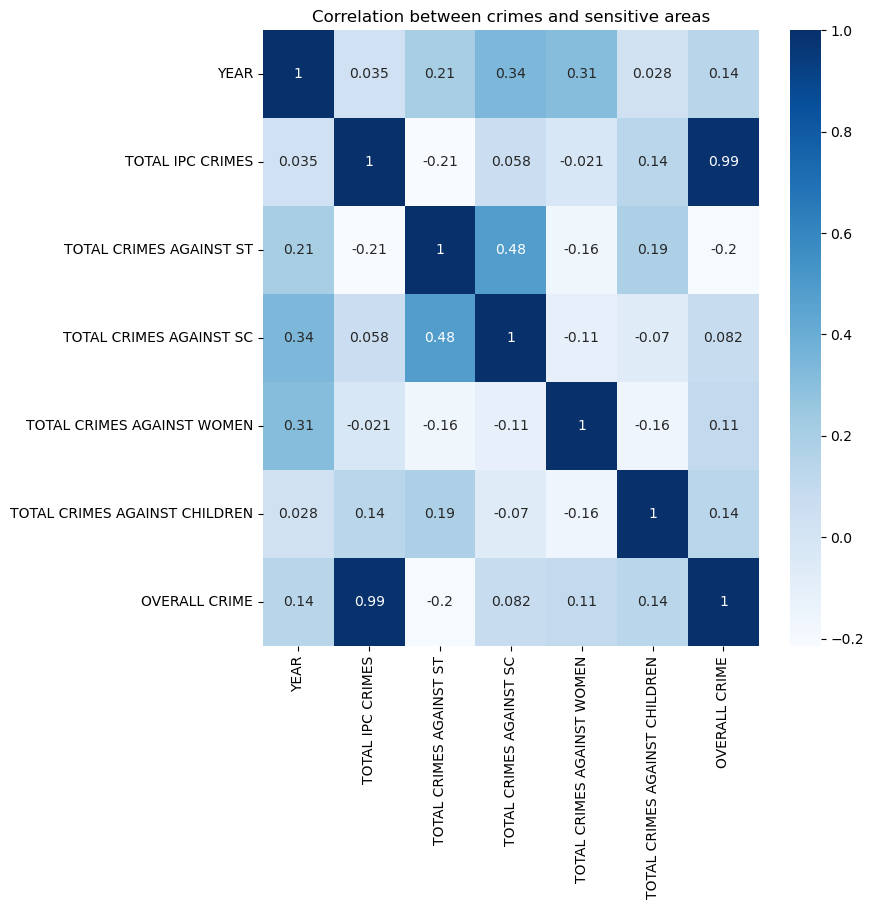

In [72]:
#Let's plot a correlation graph / heatmap for the above question.
plt.figure(figsize=(8,8))
sns.heatmap(Sensitive_regions.iloc[:,2:].corr(), annot=True, cmap="Blues")
plt.title("Correlation between crimes and sensitive areas")
plt.show()

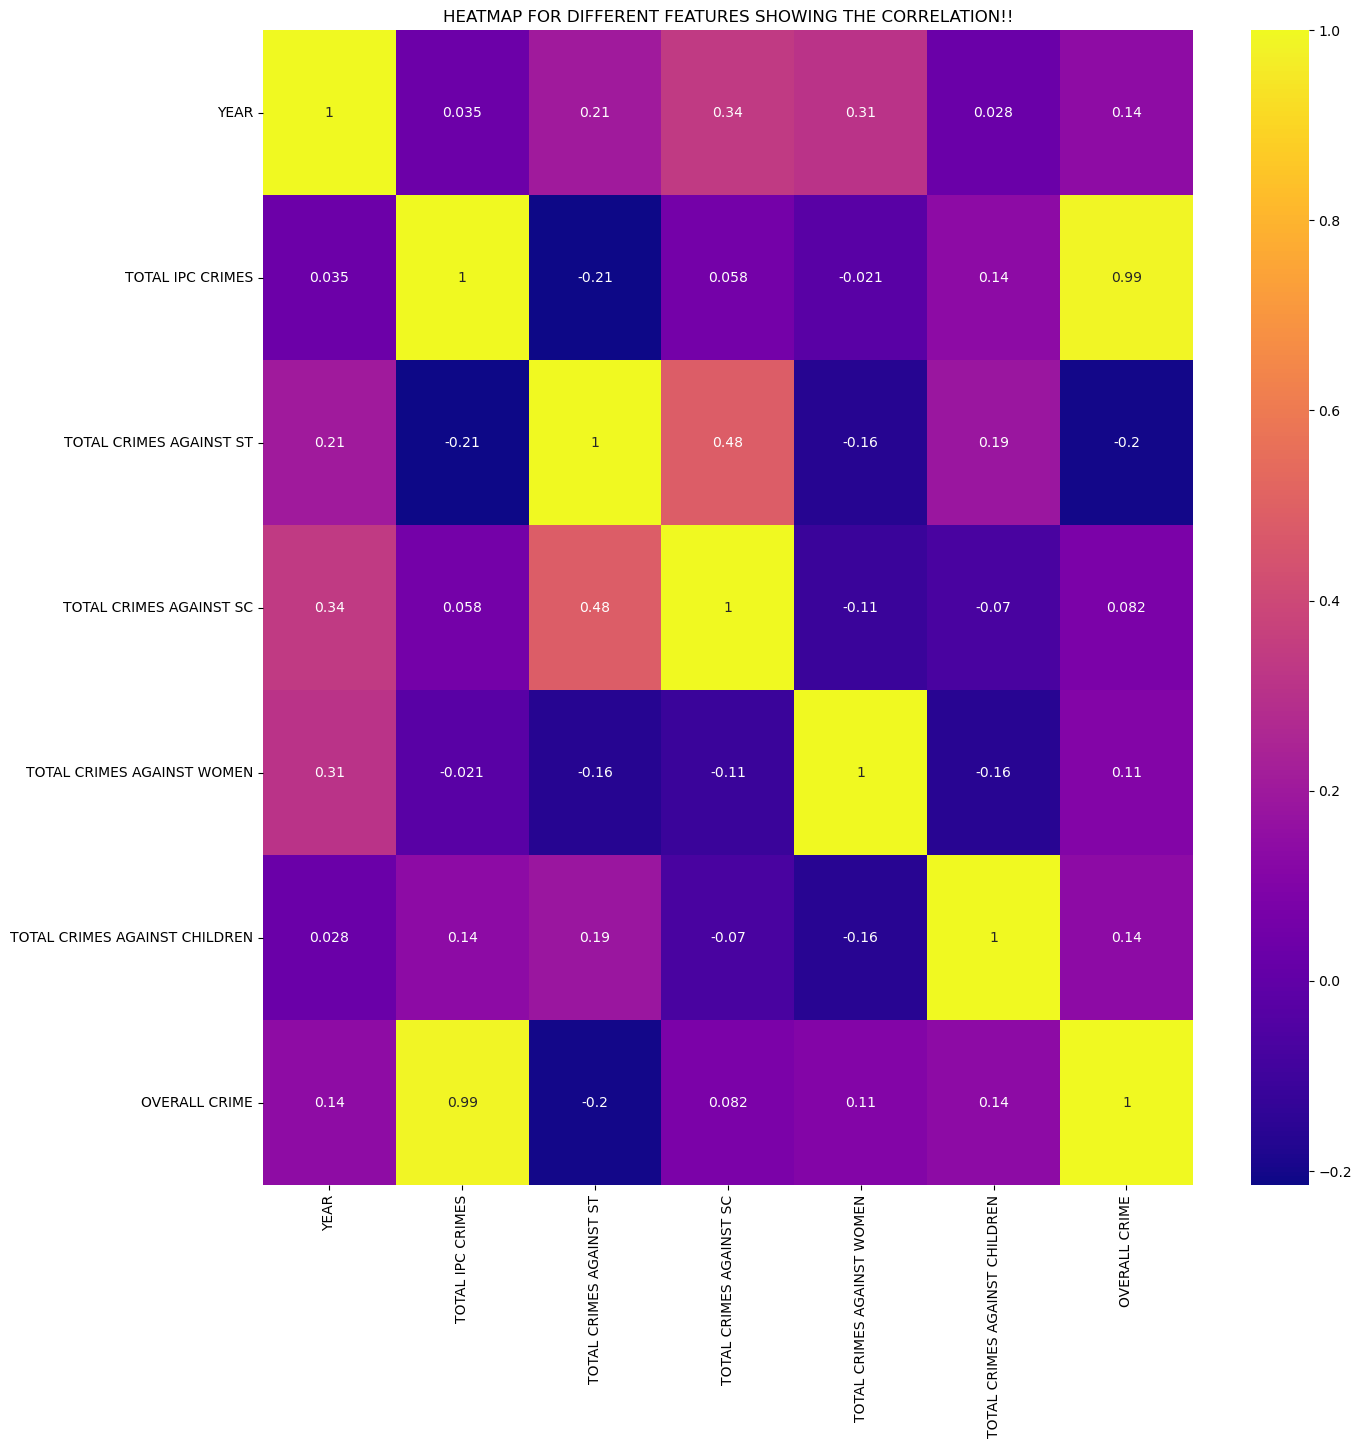

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(Sensitive_regions.iloc[:,2:].corr(),annot=True,cmap='plasma')
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION!!")
plt.show()

# 2. What needs to be done to reduce crime

Crime prevention plays a vital role in creating a safer and more secure society, minimising the risks associated with criminal behaviour and the impact of crime on individuals, communities, and the nation. Implementing robust crime prevention strategies and measures benefits various aspects of society, from improving individual well-being to fostering economic growth.

Reducing crime rates in any country requires a comprehensive approach involving various stakeholders and addressing multiple factors.Expedite the judicial process and ensure swift and fair trials. Increase the number of courts and judges to reduce the backlog of cases. Implement measures to improve witness protection and enhance the efficiency of the criminal justice system. Crime prevention is critical to maintain law and order in the country.

1) increasing the effort required for criminals to commit the crime
2) increasing the risk for offenders to be caught
3) reducing the rewards from the crime
4) removing excuses that justify criminal behaviour
5) reducing crime provocations and opportunities in the environment.

# 3. Most safe and unsafe districts.

Most safe states

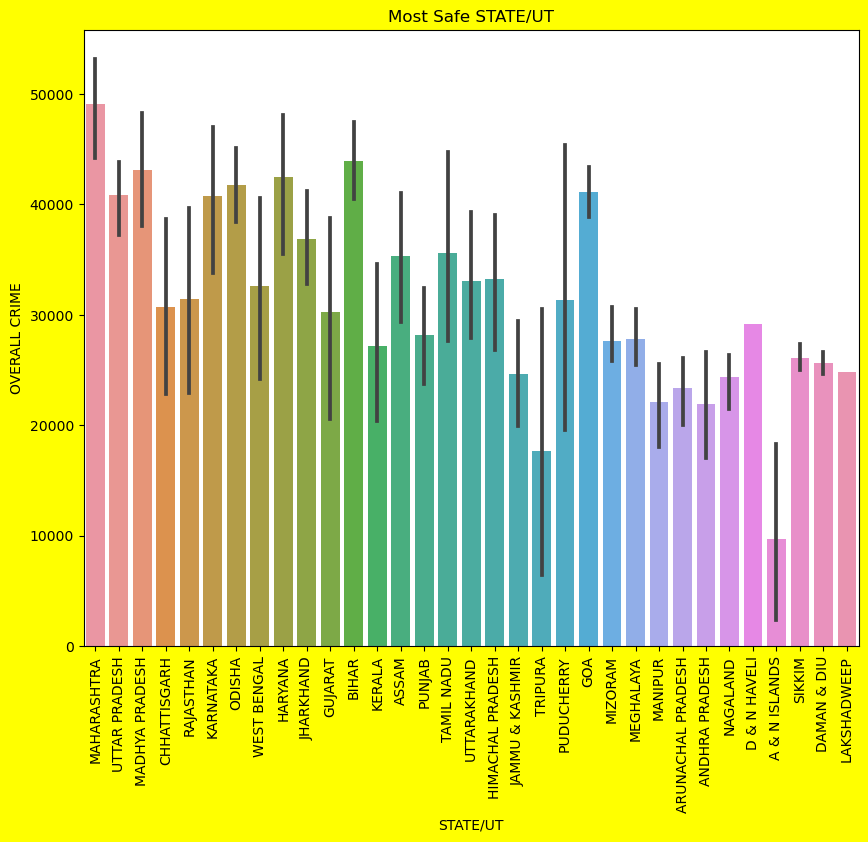

In [74]:
#Plotting for most safe states/UTs
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=peaceful_regions['STATE/UT'], y=peaceful_regions['OVERALL CRIME'])
plt.xlabel('STATE/UT')
plt.title('Most Safe STATE/UT')
plt.xticks(rotation=90)
plt.show()

 From the above plot we can see that A & N Island is the most safe UT followed by Tripura, Arunachal Pradesh, Manipur, Jharkhand, Nagaland and Lakshadweep, which are mostly safe.



Most safe districts

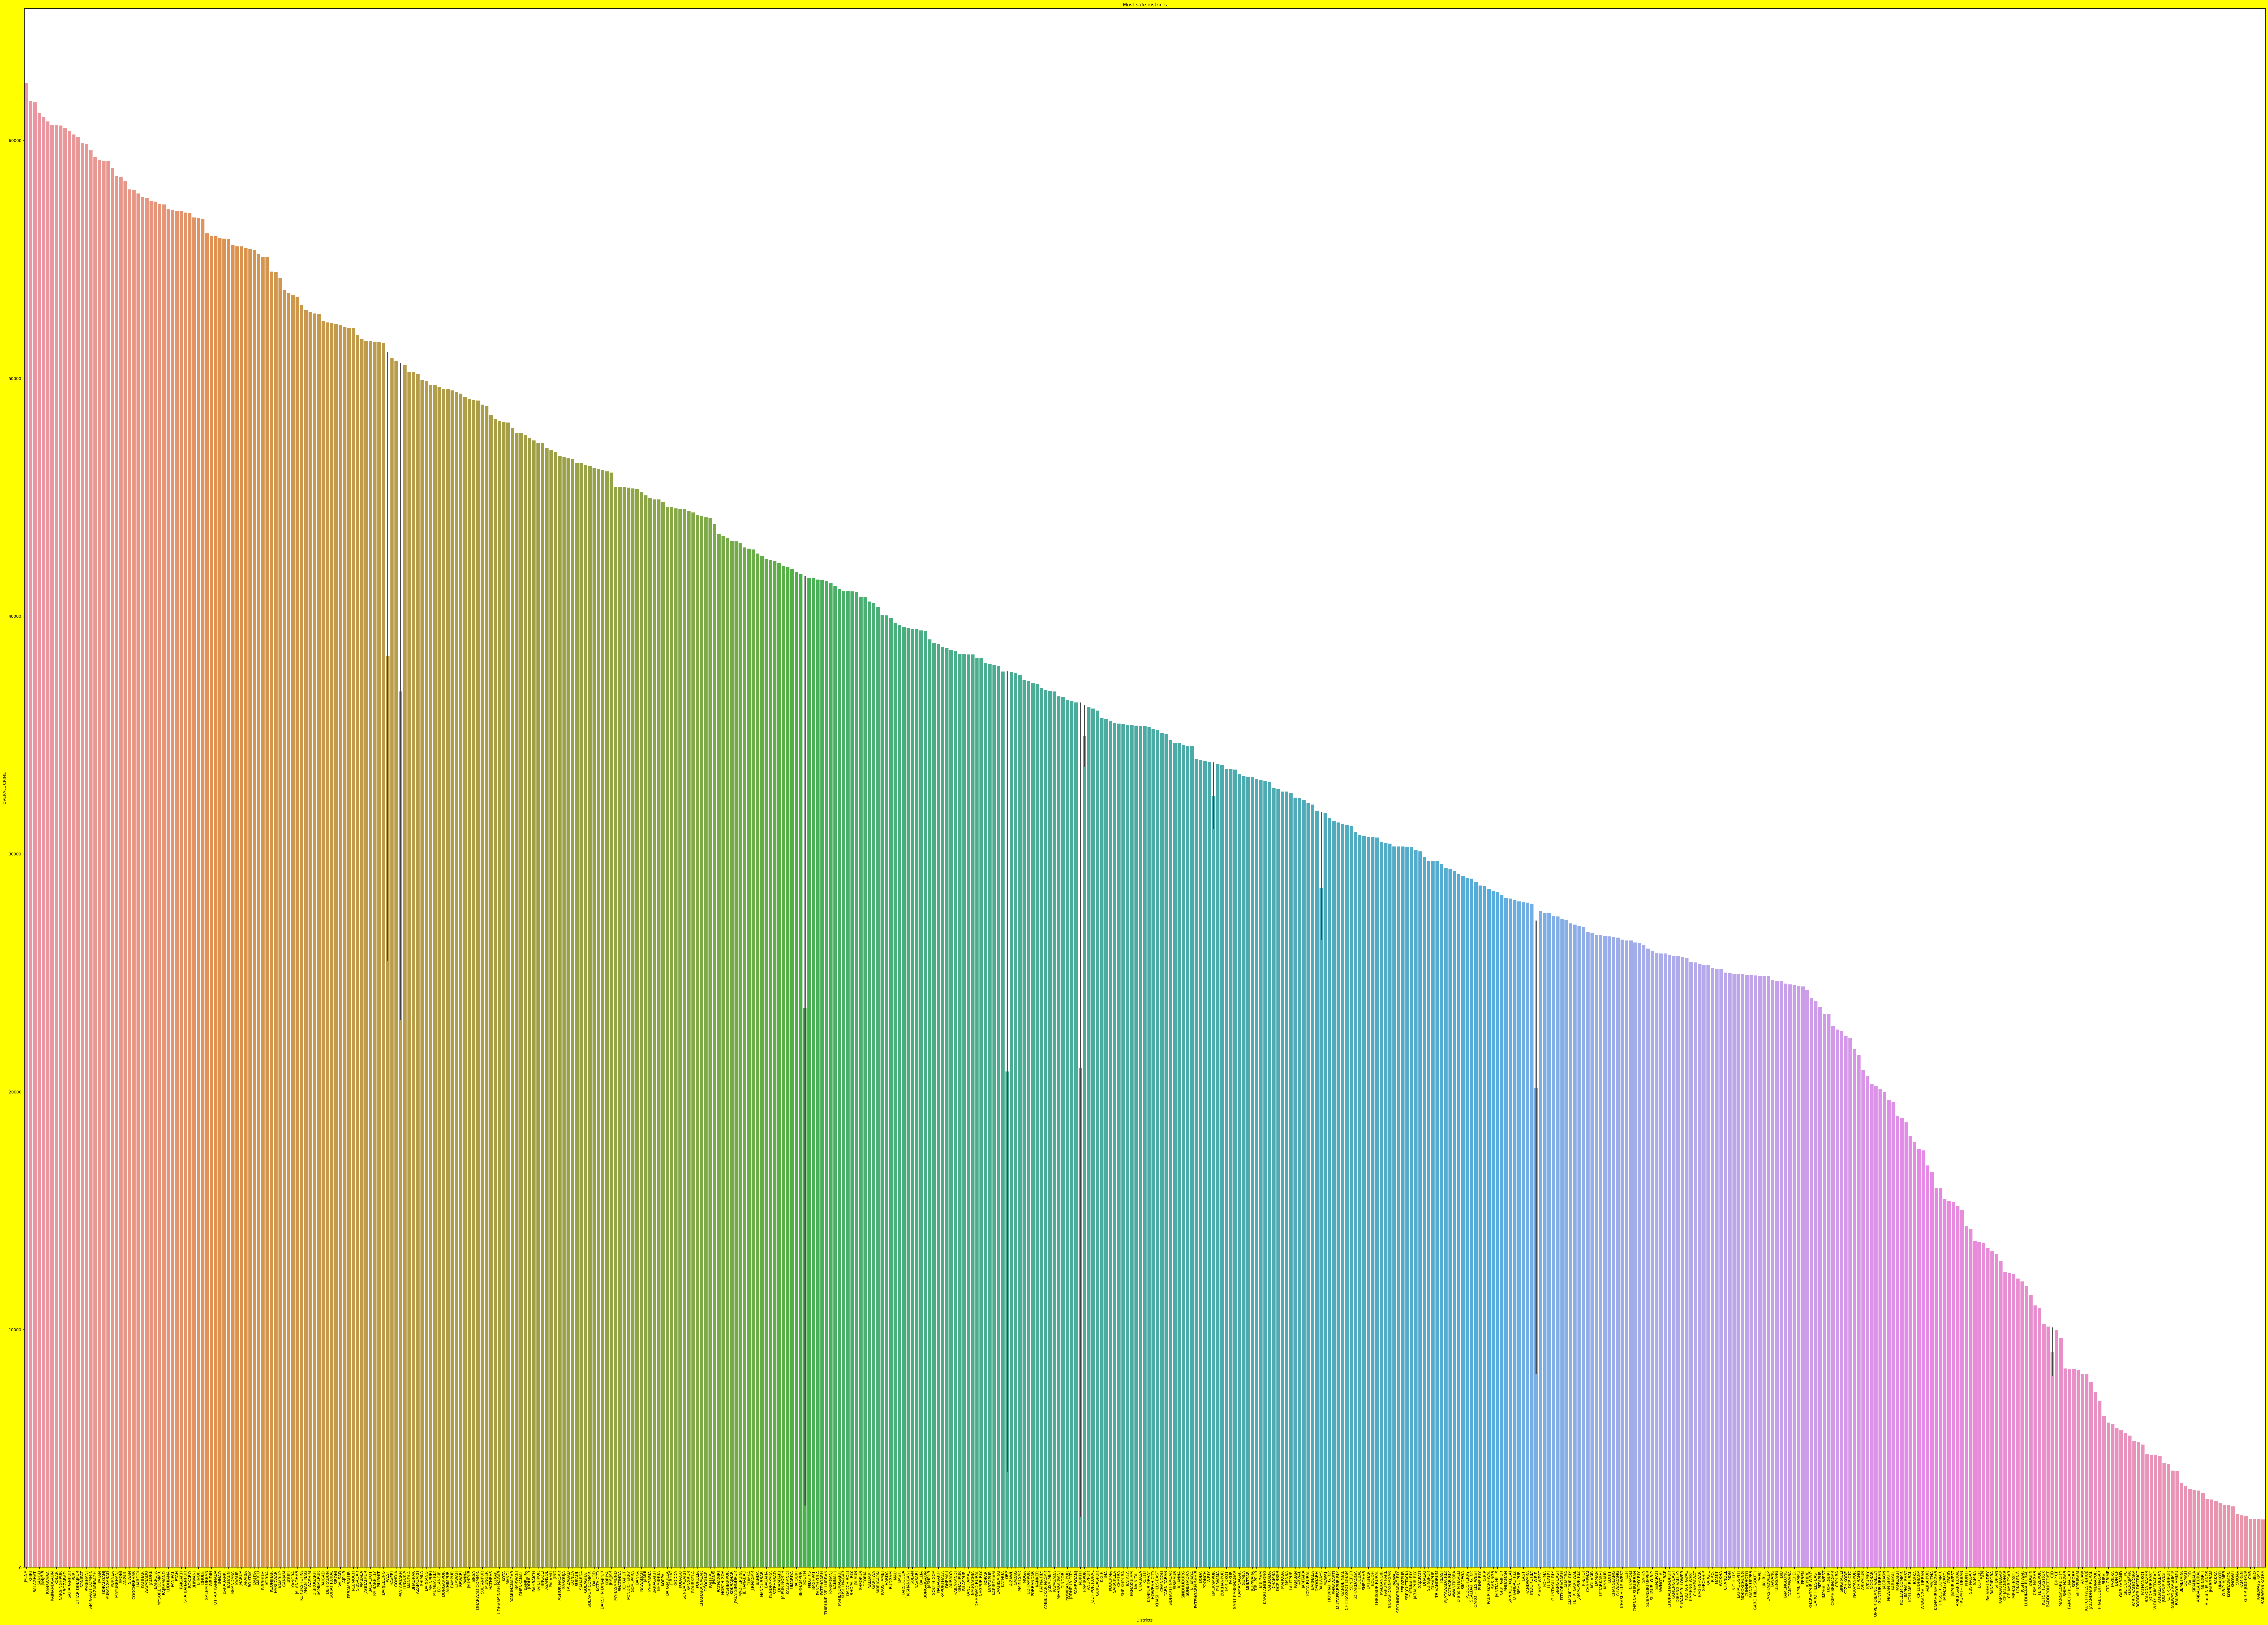

In [75]:
#Plotting for most safe districts
plt.figure(figsize=(100,70), facecolor='Yellow')
sns.barplot(x=peaceful_regions['DISTRICT'], y=peaceful_regions['OVERALL CRIME'])
plt.xlabel('Districts')
plt.title('Most safe districts')
plt.xticks(rotation=90)
plt.show()

 From the above graph we can see various safe districts where less crimes have happened. (Please double tap on the graph to zoom in).

 Most unsafe states

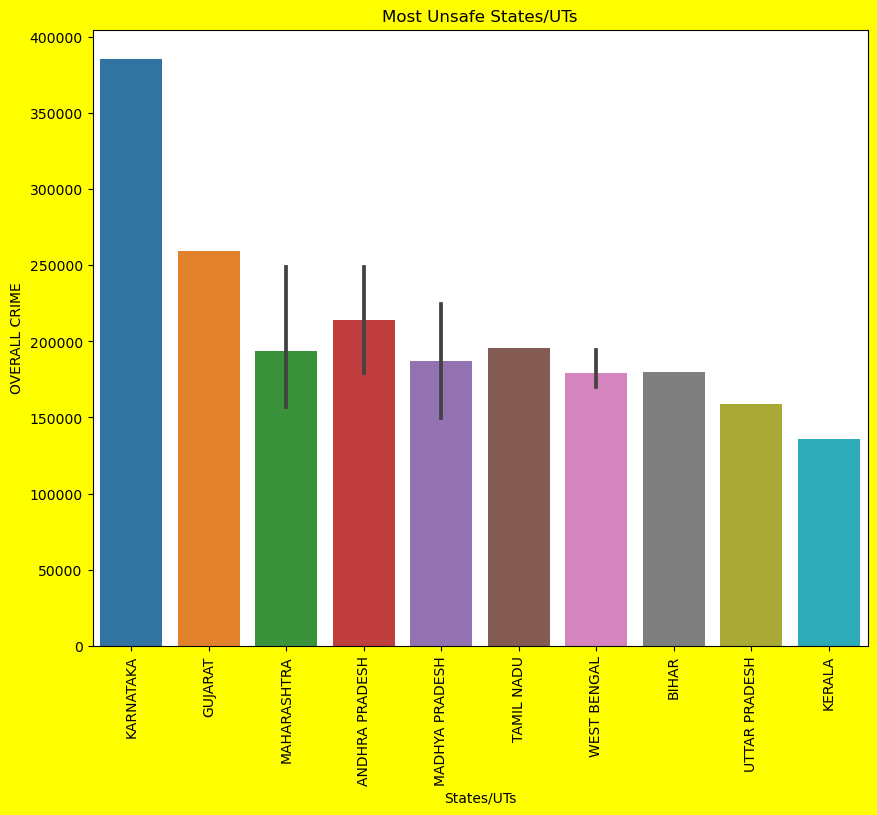

In [76]:
#Plotting graph for most unsafe states
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=Sensitive_regions['STATE/UT'], y=Sensitive_regions['OVERALL CRIME'])
plt.xlabel('States/UTs')
plt.title('Most Unsafe States/UTs')
plt.xticks(rotation=90)
plt.show()


Here, we can see that Karnataka takes the lead in most unsafe areas or states and Kerala takes the least place.

 Most unsafe districts

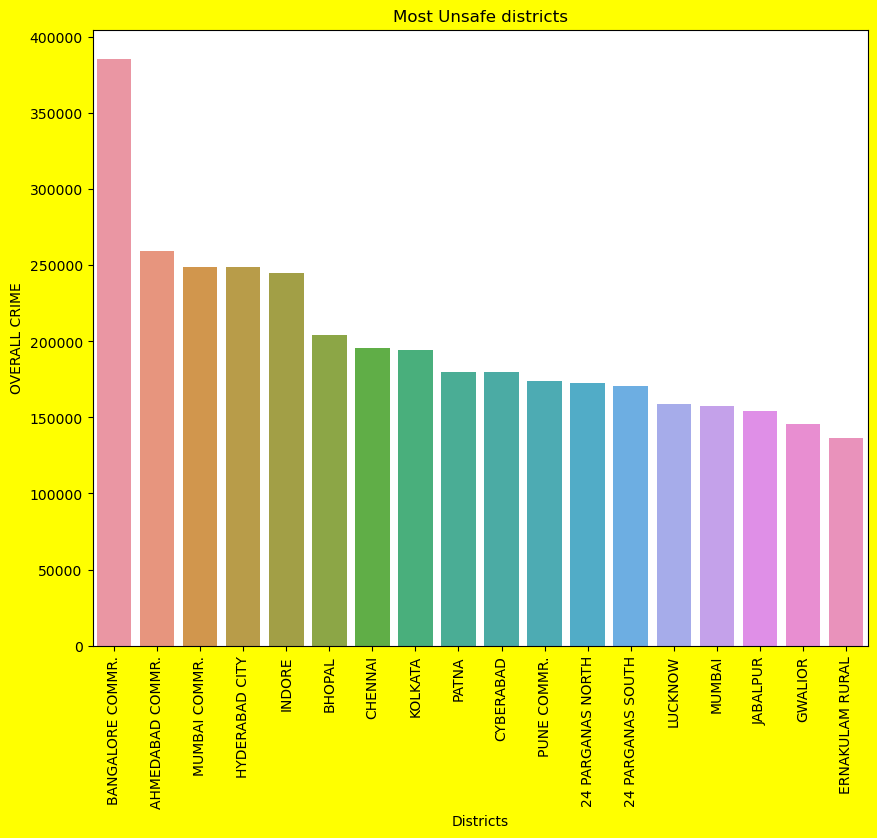

In [77]:
#Plotting for most Unsafe districts
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=Sensitive_regions['DISTRICT'], y=Sensitive_regions['OVERALL CRIME'])
plt.xlabel('Districts')
plt.title('Most Unsafe districts')
plt.xticks(rotation=90)
plt.show()

From the above plot we can see that Bangalore Commr. is the most unsafe district in terms of crimes.